In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Задание 1. Загрузка данных
insurance_data = pd.read_csv('data/insurance.csv')

In [46]:
# Задание 2. Статистика по данным
describe_insurance = insurance_data.describe()
print(describe_insurance)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


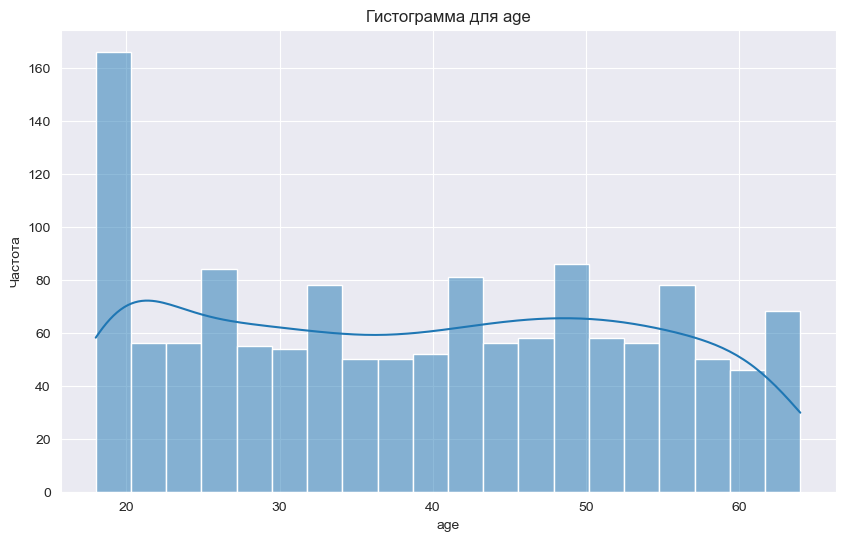

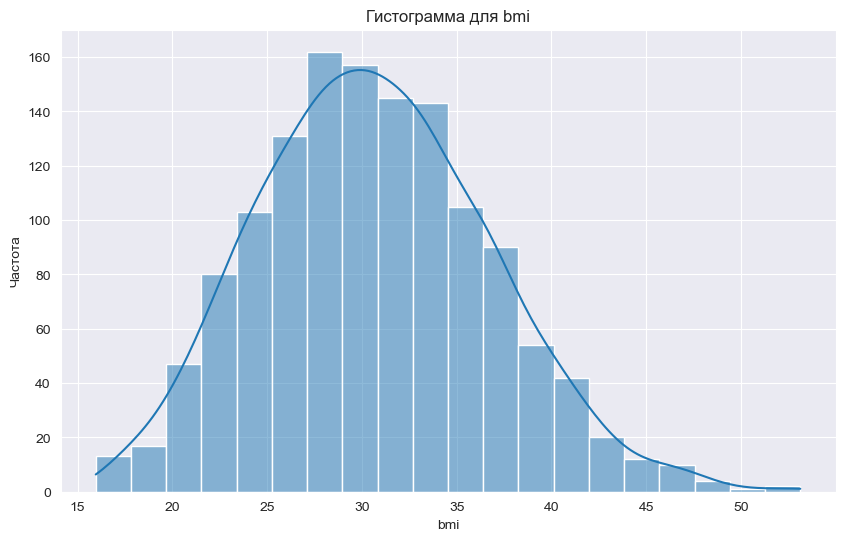

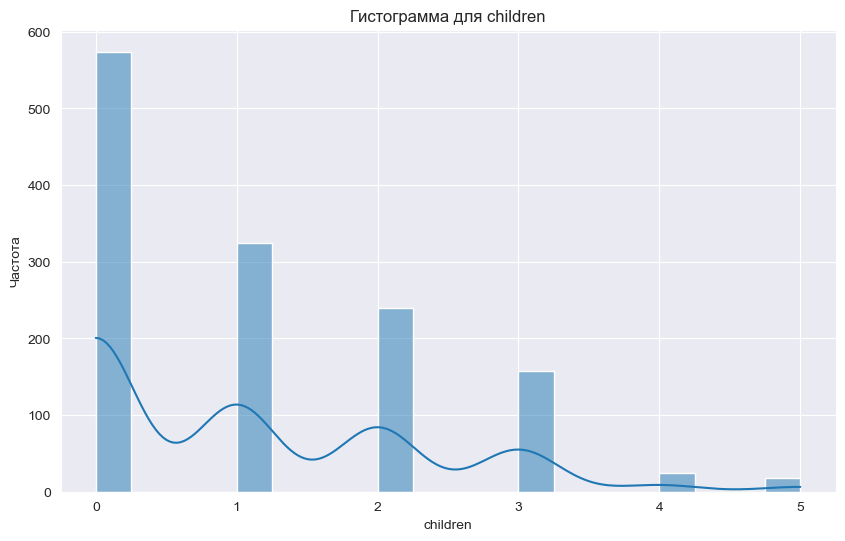

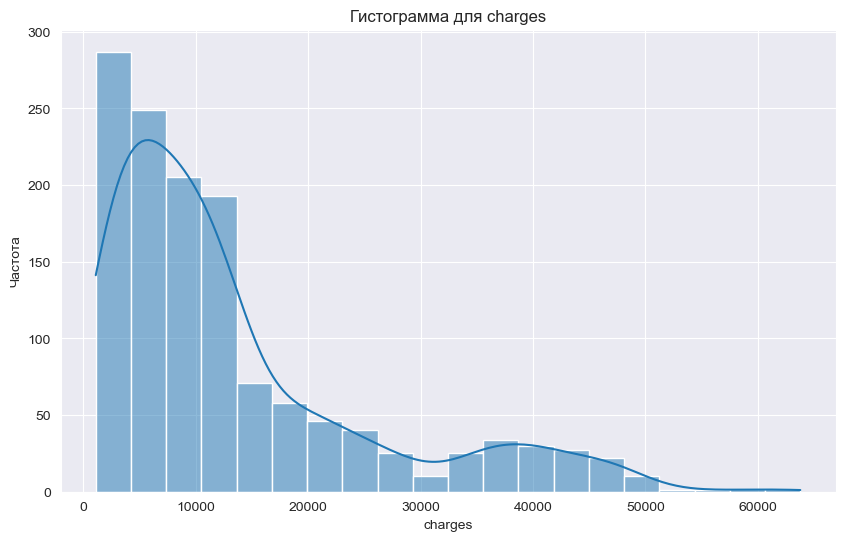

In [47]:
# Задание 3. Построение гистограмм для числовых показателей
numerical_features = insurance_data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(insurance_data[feature], kde=True, bins=20)
    plt.title(f'Гистограмма для {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.show()

Для bmi: Среднее = 30.66339686098655, Медиана = 30.4, Мода = 32.3


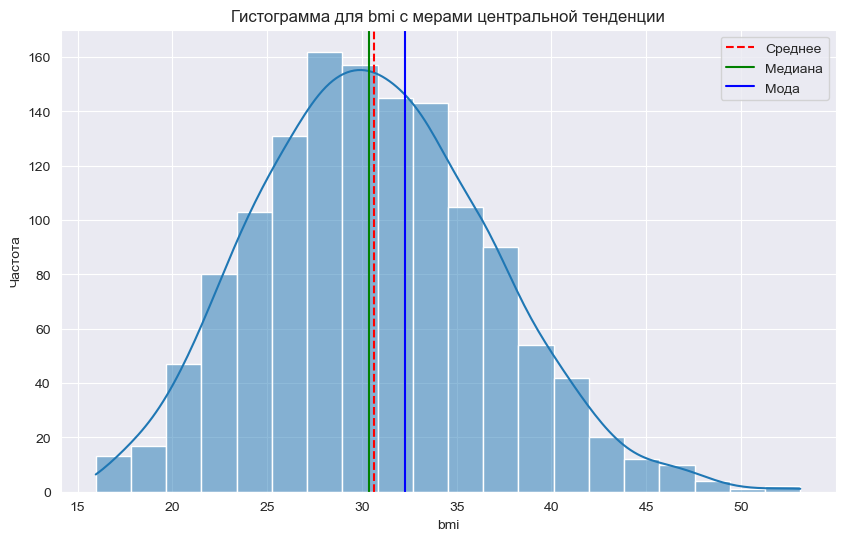

Для charges: Среднее = 13270.422265141257, Медиана = 9382.033, Мода = 1639.5631


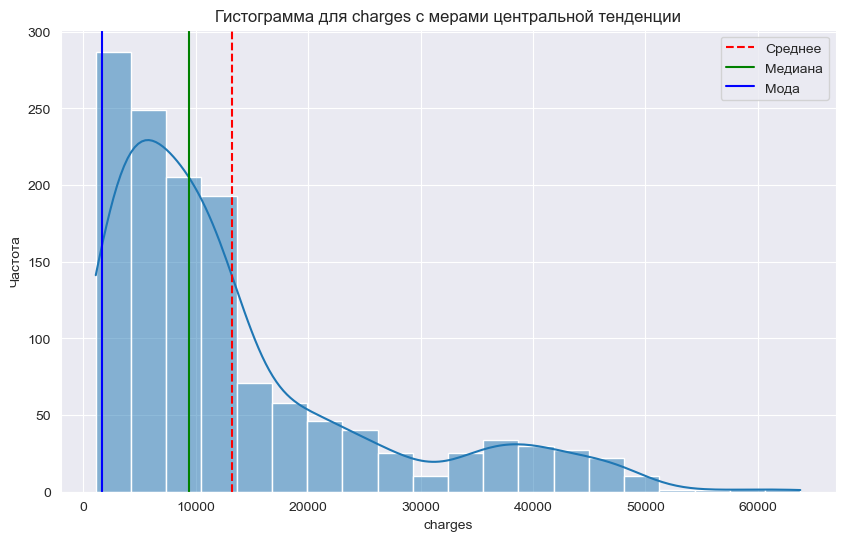

In [48]:
# Задание 4. Меры центральной тенденции и меры разброса для 'bmi' и 'charges'
for feature in ['bmi', 'charges']:
    mean_value = insurance_data[feature].mean()
    median_value = insurance_data[feature].median()
    mode_value = insurance_data[feature].mode()[0]
    print(f"Для {feature}: Среднее = {mean_value}, Медиана = {median_value}, Мода = {mode_value}")
    
    plt.figure(figsize=(10, 6))
    sns.histplot(insurance_data[feature], bins=20, kde=True)
    plt.axvline(mean_value, color='r', linestyle='--', label='Среднее')
    plt.axvline(median_value, color='g', linestyle='-', label='Медиана')
    plt.axvline(mode_value, color='b', linestyle='-', label='Мода')
    plt.legend()
    plt.title(f'Гистограмма для {feature} с мерами центральной тенденции')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.show()

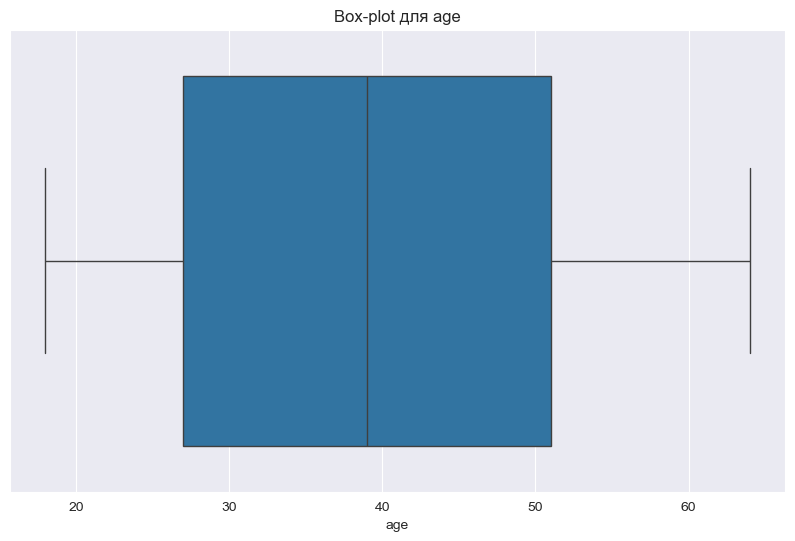

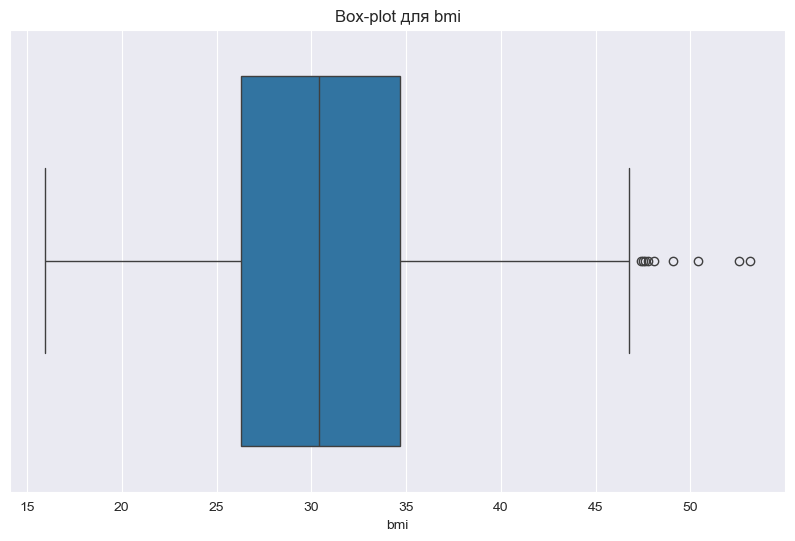

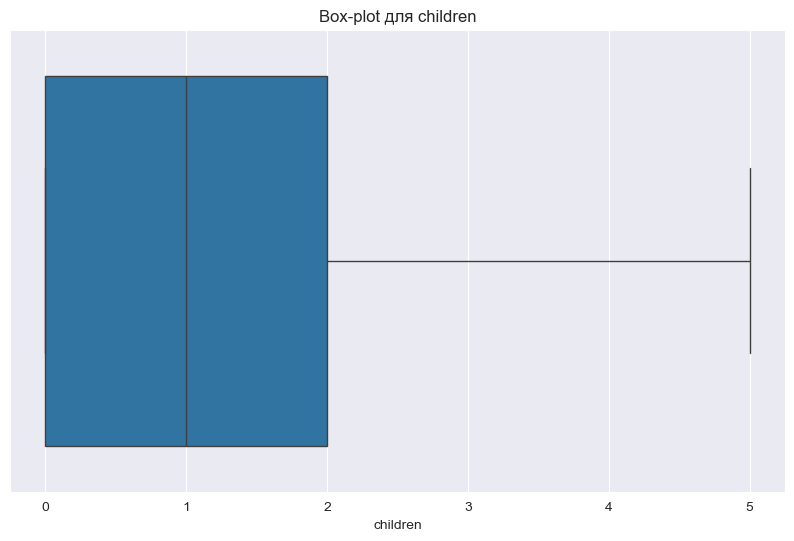

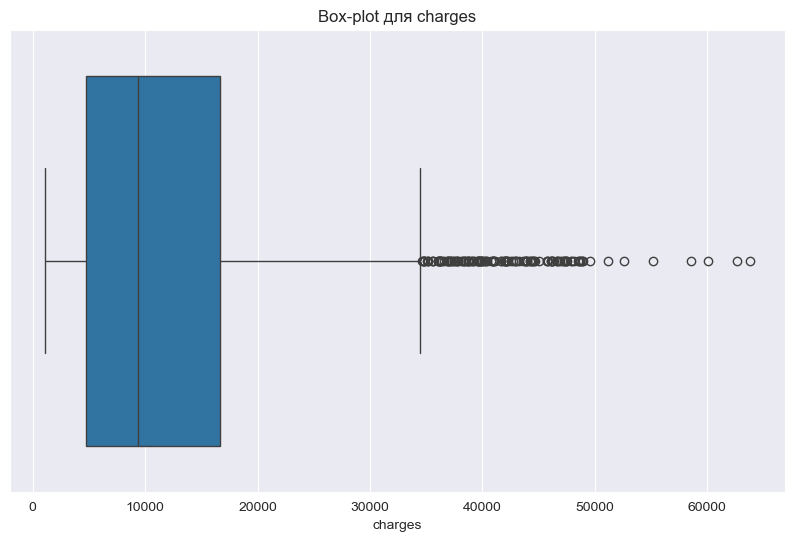

In [49]:
# Задание 5. Построение box-plot для числовых показателей
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=insurance_data[feature])
    plt.title(f'Box-plot для {feature}')
    plt.xlabel(feature)
    plt.show()

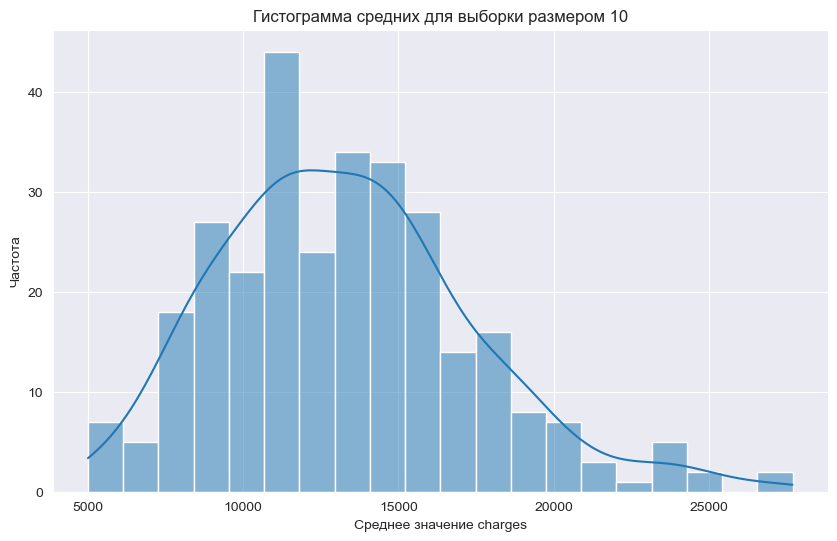

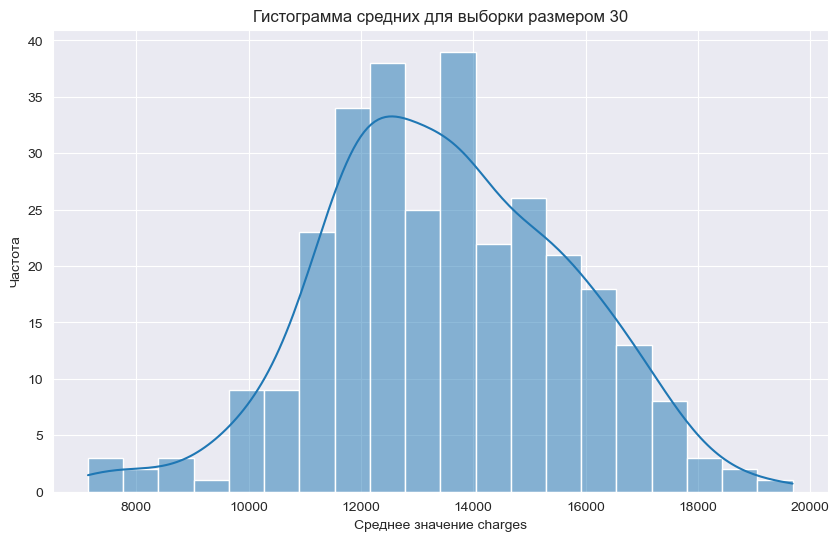

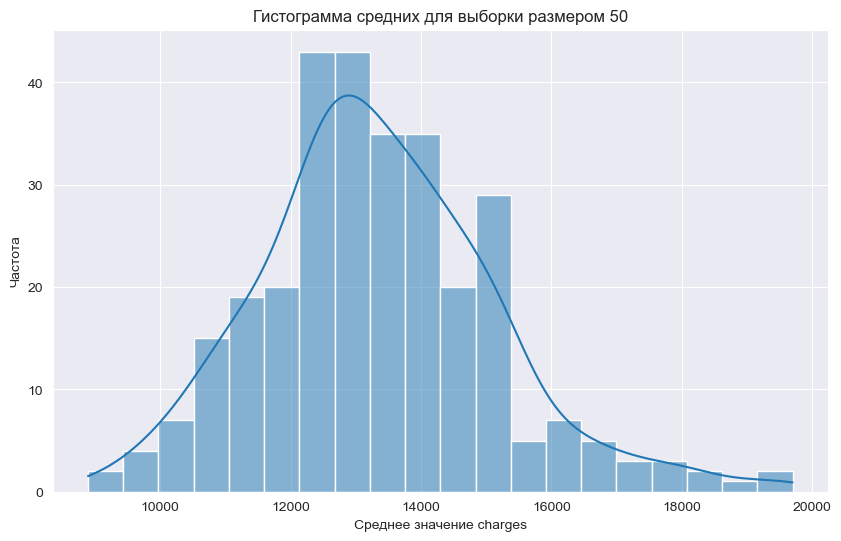

In [50]:
# Задание 6. Проверка центральной предельной теоремы для 'charges'
n = [10, 30, 50]  # разные длины выборок
sample_means = []
for sample_size in n:
    means = []
    for _ in range(300):
        sample = insurance_data['charges'].sample(sample_size, replace=True)
        means.append(sample.mean())
    sample_means.append(means)
    plt.figure(figsize=(10, 6))
    sns.histplot(means, kde=True, bins=20)
    plt.title(f'Гистограмма средних для выборки размером {sample_size}')
    plt.xlabel('Среднее значение charges')
    plt.ylabel('Частота')
    plt.show()

In [51]:
# Задание 7. Построение доверительных интервалов для 'charges' и 'bmi'
confidence_levels = [0.95, 0.99]
for feature in ['charges', 'bmi']:
    mean = insurance_data[feature].mean()
    std_error = insurance_data[feature].std() / np.sqrt(len(insurance_data))
    for confidence in confidence_levels:
        z_score = stats.norm.ppf(1 - (1 - confidence) / 2)
        margin_of_error = z_score * std_error
        lower_bound = mean - margin_of_error
        upper_bound = mean + margin_of_error
        print(f"{int(confidence * 100)}% доверительный интервал для {feature}: [{lower_bound:.2f}, {upper_bound:.2f}]")


95% доверительный интервал для charges: [12621.54, 13919.30]
99% доверительный интервал для charges: [12417.65, 14123.20]
95% доверительный интервал для bmi: [30.34, 30.99]
99% доверительный интервал для bmi: [30.23, 31.09]


Проверка распределения bmi на нормальность
KS-тест: статистика=0.026, p-значение=0.316


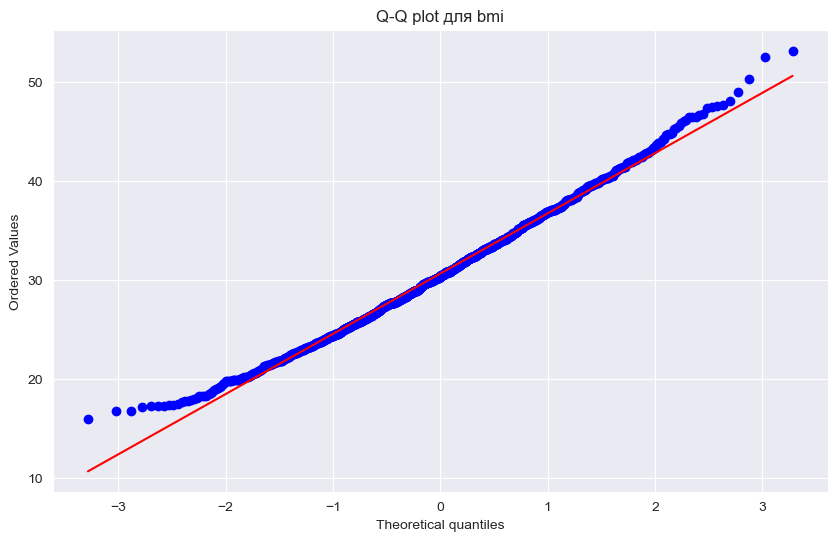

Проверка распределения charges на нормальность
KS-тест: статистика=0.188, p-значение=0.000


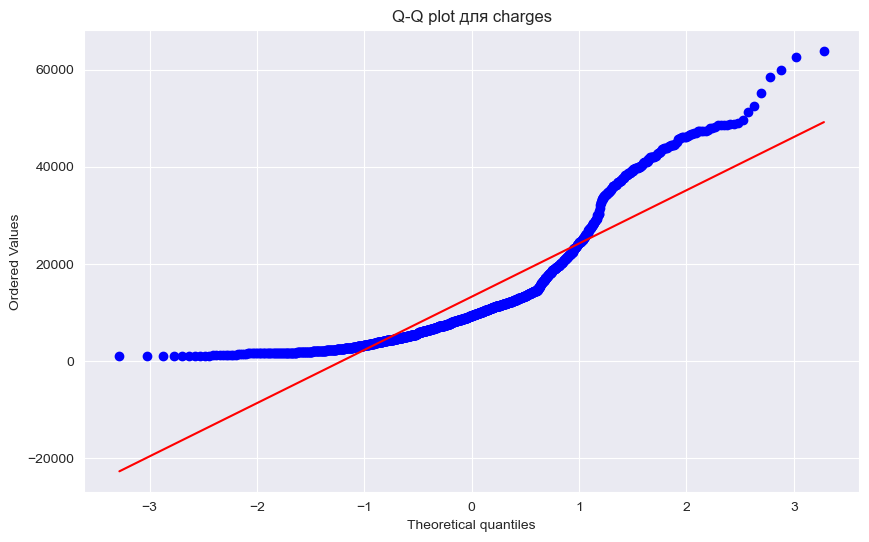

In [52]:
# Задание 8. Проверка распределений признаков на нормальность
for feature in ['bmi', 'charges']:
    print(f"Проверка распределения {feature} на нормальность")
    stat, p_value = stats.kstest(insurance_data[feature], 'norm', args=(insurance_data[feature].mean(), insurance_data[feature].std()))
    print(f"KS-тест: статистика={stat:.3f}, p-значение={p_value:.3f}")
    
    # q-q plot
    plt.figure(figsize=(10, 6))
    stats.probplot(insurance_data[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q plot для {feature}')
    plt.show()

In [53]:
# Задание 9. Загрузка данных из файла "ECDCCases.csv"
ecdc_data = pd.read_csv('data/ECDCCases.csv')

In [54]:
# Задание 10. Проверка наличия пропусков и их обработка
missing_values = ecdc_data.isna().sum() / len(ecdc_data) * 100
print("Пропущенные значения в процентах:\n", missing_values)
columns_to_drop = missing_values.nlargest(2).index
ecdc_data = ecdc_data.drop(columns=columns_to_drop)

for column in ecdc_data.columns:
    if ecdc_data[column].dtype == 'object':
        ecdc_data[column] = ecdc_data[column].fillna('other')
    else:
        ecdc_data[column] = ecdc_data[column].fillna(ecdc_data[column].median())

print("Проверка отсутствия пропусков:\n", ecdc_data.isna().sum())

Пропущенные значения в процентах:
 dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
geoId                                                         0.444236
countryterritoryCode                                          0.198695
popData2019                                                   0.198695
continentExp                                                  0.000000
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.650750
dtype: float64
Проверка отсутствия пропусков:
 dateRep                    0
day                        0
month   

In [55]:
# Задание 11. Статистика по данным и выбросы
print(ecdc_data.describe())
if 'deaths' in ecdc_data.columns:
    print("Дни, когда количество смертей превысило 3000:")
    print(ecdc_data[ecdc_data['deaths'] > 3000])

                day         month          year          cases        deaths  \
count  61904.000000  61904.000000  61904.000000   61904.000000  61904.000000   
mean      15.629232      7.067104   2019.998918    1155.079026     26.053987   
std        8.841624      2.954816      0.032881    6779.010824    131.222948   
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000   
25%        8.000000      5.000000   2020.000000       0.000000      0.000000   
50%       15.000000      7.000000   2020.000000      15.000000      0.000000   
75%       23.000000     10.000000   2020.000000     273.000000      4.000000   
max       31.000000     12.000000   2020.000000  234633.000000   4928.000000   

        popData2019  
count  6.190400e+04  
mean   4.091909e+07  
std    1.529798e+08  
min    8.150000e+02  
25%    1.324820e+06  
50%    7.169456e+06  
75%    2.851583e+07  
max    1.433784e+09  
Дни, когда количество смертей превысило 3000:
          dateRep  day  month  year

In [56]:
# Задание 12. Поиск и удаление дубликатов
duplicates = ecdc_data.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")
ecdc_data = ecdc_data.drop_duplicates()

Количество дубликатов: 4


In [57]:
# Задание 13. Сравнение индекса массы тела для northwest и southwest
bmi_data = pd.read_csv('data/bmi.csv')
northwest_bmi = bmi_data[bmi_data['region'] == 'northwest']['bmi']
southwest_bmi = bmi_data[bmi_data['region'] == 'southwest']['bmi']
# Проверка на нормальность
nw_stat, nw_p = stats.shapiro(northwest_bmi)
sw_stat, sw_p = stats.shapiro(southwest_bmi)
print(f"Shapiro-Wilk тест для northwest: статистика={nw_stat:.3f}, p-значение={nw_p:.3f}")
print(f"Shapiro-Wilk тест для southwest: статистика={sw_stat:.3f}, p-значение={sw_p:.3f}")
# Проверка на гомогенность дисперсии
bartlett_stat, bartlett_p = stats.bartlett(northwest_bmi, southwest_bmi)
print(f"Критерий Бартлетта: статистика={bartlett_stat:.3f}, p-значение={bartlett_p:.3f}")
# t-тест Стьюдента
t_stat, t_p = stats.ttest_ind(northwest_bmi, southwest_bmi, equal_var=True)
print(f"t-критерий Стьюдента: статистика={t_stat:.3f}, p-значение={t_p:.3f}")

Shapiro-Wilk тест для northwest: статистика=0.995, p-значение=0.466
Shapiro-Wilk тест для southwest: статистика=0.995, p-значение=0.363
Критерий Бартлетта: статистика=3.400, p-значение=0.065
t-критерий Стьюдента: статистика=-3.284, p-значение=0.001


In [58]:
# Задание 14. Проверка равномерности распределения для игрального кубика
observed = [97, 98, 109, 95, 97, 104]
expected = [100] * 6
chi2_stat, chi2_p = stats.chisquare(f_obs=observed, f_exp=expected)
print(f"Хи-квадрат тест для кубика: статистика={chi2_stat:.3f}, p-значение={chi2_p:.3f}")

Хи-квадрат тест для кубика: статистика=1.440, p-значение=0.920


In [59]:
# Задание 15. Проверка зависимости между семейным положением и занятостью
data = pd.DataFrame({'Женат': [89, 17, 11, 43, 22, 1],
                     'Гражданский брак': [80, 22, 20, 35, 6, 4],
                     'Не состоит в отношениях': [35, 44, 35, 6, 8, 22]})
data.index = ['Полный рабочий день', 'Частичная занятость', 'Временно не работает', 'На домохозяйстве', 'На пенсии', 'Учёба']
chi2_stat, chi2_p, dof, expected = stats.chi2_contingency(data)
print(f"Хи-квадрат тест на независимость: статистика={chi2_stat:.3f}, p-значение={chi2_p:.3f}")


Хи-квадрат тест на независимость: статистика=122.297, p-значение=0.000
